In [44]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [45]:
# import clinical trial data
ctrial_file = "clinicaltrial_data.csv"
ctrial_path = os.path.join('raw_data', ctrial_file)

ctrial_df = pd.read_csv(ctrial_path)
ctrial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [46]:
# import mouse drug data
mouse_file = "mouse_drug_data.csv"
mouse_path = os.path.join('raw_data', mouse_file)

mouse_df = pd.read_csv(mouse_path)
mouse_df.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [47]:
# merge the mouse and clinical trial data
combined = pd.merge(mouse_df, ctrial_df, on ="Mouse ID")

combined.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [63]:
# Limit the data based on tumor volume
t_volume_df = combined[["Timepoint", "Drug", "Tumor Volume (mm3)"]]

# create a group by drug and timepoint
t_vol_grp = t_volume_df.groupby(["Drug", "Timepoint"])

# create a volume for data framing
t_vol = t_vol_grp["Tumor Volume (mm3)"].mean()

# create the data frame for reorginzing
t_vol_df = pd.DataFrame({"Tumor Volume": t_vol})

# reorder the data frame so the drugs are the columns, and the time point is the rows
t_vol_reorder = t_vol_df.pivot_table('Tumor Volume', 'Timepoint', 'Drug')
t_vol_reorder.columns.name = None

# reset order and melt so that the columns can be used in the plot
t_vol_reorder = t_vol_reorder.reset_index()
t_vol_reorder = t_vol_reorder.melt('Timepoint', var_name='cols',  value_name='vals')
t_vol_reorder.head()


,Timepoint,cols,vals
0,0,Capomulin,45.000000
1,5,Capomulin,44.266086
2,10,Capomulin,43.084291
3,15,Capomulin,42.064317
4,20,Capomulin,40.716325


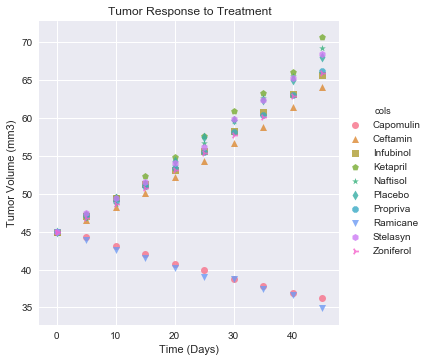

In [84]:
# create a list of markers
markers = ["o", "^", "s", "p", "*", "d", "8", "v", "h", "4"]

# plot the tumor response to treatment
sns.lmplot(x = "Timepoint", y="vals", hue='cols', data = t_vol_reorder, legend = True, fit_reg = False, markers = markers)

# create the legends and titles
#plt.legend(loc='best')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

plt.show()